<a href="https://colab.research.google.com/github/gracy15/Machine_learning/blob/main/Comparison_of_ML_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparison of different Machine Learning Algorithm using one Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
data = pd.read_csv('/content/drive/MyDrive/csv_result-PhishingData.csv')
data.head()

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.head()

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1


In [6]:
#we dont need id
X = data.iloc[:,1:-1]
X = X.values
Y = data.iloc[:,-1].values

In [7]:
print(X)

[[ 1 -1  1 ...  1  1  0]
 [-1 -1 -1 ...  1  1  1]
 [ 1 -1  0 ... -1  1  0]
 ...
 [-1  0 -1 ... -1 -1  0]
 [ 0  0  1 ... -1  1  0]
 [ 1  0  1 ... -1 -1  0]]


In [8]:
print(Y)

[ 0  1  1 ...  1  1 -1]


Normalizing the data

In [9]:
from sklearn import preprocessing
X1 = preprocessing.normalize(X)

In [10]:
print(X1)

[[ 0.35355339 -0.35355339  0.35355339 ...  0.35355339  0.35355339
   0.        ]
 [-0.35355339 -0.35355339 -0.35355339 ...  0.35355339  0.35355339
   0.35355339]
 [ 0.4472136  -0.4472136   0.         ... -0.4472136   0.4472136
   0.        ]
 ...
 [-0.40824829  0.         -0.40824829 ... -0.40824829 -0.40824829
   0.        ]
 [ 0.          0.          0.57735027 ... -0.57735027  0.57735027
   0.        ]
 [ 0.40824829  0.          0.40824829 ... -0.40824829 -0.40824829
   0.        ]]


Splitting of dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.25, random_state = 42)

In [12]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1014, 9) (1014,) (339, 9) (339,)


# Logistic Regression

Logistic Regression is a classification model. It is used to assign observations to a discrete set of class, i.e., output lable is discrete in logistic regression. It is a probabilistic model.

Logistic regression uses an activation function called the ***Sigmoid Function*** .

Output in logistic regression is (0 <= x <= 1).
Sigmoid functions limits the cost function between 0 and 1.
Predictive function for Logistic Regression is: y^ = c1x1 + c2x2 + c3x3 + b

where c1,c2,c3 are coefficient, x1,x2,x3 are features and b is bias.

Here we can not use mean squared error as the cost function, so we use ***Cross Entropy*** also called log loss instead.

J = -y (log(y^)) , for y = 1

J = -(1-y) (log(1-y^)) , for y = 0

In [13]:
from sklearn.linear_model import LogisticRegression
reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred)*100

NameError: ignored

# Naive Bayes

Naive Bayes is a collection of classification algorithm based on ***Bayes Theorem***.  Every pair of features being classified is independent of each other.

In Gaussian Naive Bayes classifier, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

In [15]:
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred)*100

82.00589970501476

# KNN

K-nearest neighbors is a non-parametric method used for classification and regression. It works on real time computation.  

The basic concept of KNN is to explore the neighbors around and assume that the test datapoint to be similar to them and derive the output. To come up with prediction, we look for k neighbors.


In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)
from sklearn import  metrics
metrics.accuracy_score(Y_test, y_pred)*100

87.90560471976401

In [17]:
seed = 4

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [19]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.829341 (0.031174)
KNN: 0.863268 (0.018754)
NB: 0.813072 (0.027997)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


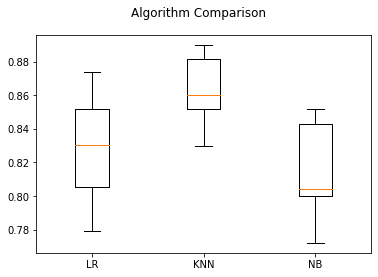

In [20]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()